In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

사진을 neural network에 입력하기 위해서는 숫자로 바꿔서 input 해야함

이미지의 픽셀데이터를 숫자로 표현(RGB값)

컬러 RGB값 3개\[0\~255, 0\~255, 0\~255], 흑백 0~255

### 데이터 로드 및 확인

In [5]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [12]:
trainX[0] # 이미지데이터를 행렬로 표현

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [39]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [21]:
trainY

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
trainX.shape # 28*28 픽셀의 데이터가 60000개

(60000, 28, 28)

In [23]:
trainY.shape # label을 정수로 치환한 데이터 60000개

(60000,)

<function matplotlib.pyplot.show(close=None, block=None)>

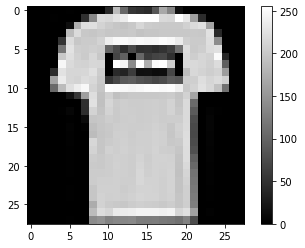

In [31]:
plt.imshow(trainX[1]) # 2d array 형식의 데이터를 이미지로
plt.gray() # 흑백
plt.colorbar() # 흑백 RGB값
plt.show # 출력

### 모델 생성

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(28, 28), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Flatten(), # 다차원 레이어를 1차원으로
    tf.keras.layers.Dense(10, activation='softmax')
])

확률 예측 문제라면

1. 마지막 레이어 노드수를 카테고리 갯수만큼

2. crossentropy라는 손실함수 사용

sigmoid: 결과를 0~1로 압축

1. binary 예측문제에 사용

2. 마지막 노드개수 1개

softmax: 결과를 0~1로 압축

1. 카테고리 예측문제에 사용
 
2. 마지막 노드개수 카테고리 개수만큼

3. 예측한 카테고리 별 확률을 모두 더하면 1

In [45]:
model.summary() # model을 생성할 때, 데이터하나의 shape를 넣어줘야함(input_shape)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 28, 128)           3712      
                                                                 
 dense_16 (Dense)            (None, 28, 64)            8256      
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dense_17 (Dense)            (None, 10)                17930     
                                                                 
Total params: 29,898
Trainable params: 29,898
Non-trainable params: 0
_________________________________________________________________


'Param #'은 학습가능한 w, b 개수

In [54]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

category 분류에서 손실함수 사용

trainY가 정수인코딩이 되어있을 때: sparse_categorical_crossentropy

trainY가 원핫인코딩이 되어있을 때, categorical_crossentropy

In [55]:
model.fit(trainX, trainY, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3807 - accuracy: 0.8637
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3521 - accuracy: 0.8734
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3418 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3315 - accuracy: 0.8803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3224 - accuracy: 0.8845
